### Load libraries

Create an environment using requirements.txt if you don't have the libraries installed. 

In [768]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from itertools import combinations
from collections import defaultdict
from matplotlib.ticker import FuncFormatter

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style='whitegrid')


### Load data (change the paths to your local paths)

In [712]:
# Load outpatients data
# REMEMBER TO CHANGE THE PATH TO THE FILE TO YOUR LOCAL PATH
df = pd.read_csv(r"C:\Users\Lasse\Desktop\DTU\Kandidat\4. semester\From Analytics to Action\Case\Rigshospitalet\datasets\Rigshospitalet\Case Rigshospitalet.csv")
# Display the first few rows of the dataframe to verify loading
df.head()


C:\Users\Lasse\AppData\Local\Temp\ipykernel_28256\3231382052.py:3: DtypeWarning: Columns (9,13,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Lasse\Desktop\DTU\Kandidat\4. semester\From Analytics to Action\Case\Rigshospitalet\datasets\Rigshospitalet\Case Rigshospitalet.csv")


,Patient ID,Patientkontakt ID,Patient alder på kontaktstart tidspunkt,Kontakt startdato,Kontakt slutdato,Kontakttype,Indlæggelsesmåde,Patientkontakttype,Aktionsdiagnosekode,Bidiagnosekode,...,Procedure udført,Behandlingskontakt ID,Besøgstype,Patient køn,Patient civilstand,Patient oprettet på Min SP (J/N),Patient land,Patient region,Patient postnummer,Patient kommune
0,Z4115614,1301023075465,0,"2023-01-13 12:32:00,000","2023-01-13 13:02:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-01-13 12:32:00,000",176.794.528,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
1,Z4115614,1301023121831,0,"2023-01-15 13:27:00,000","2023-01-15 13:57:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-01-15 13:27:00,000",177.035.032,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
2,Z4119225,1301023357249,0,"2023-01-30 10:20:00,000","2023-01-30 10:50:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-01-30 10:20:00,000",178.269.449,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
3,Z4127033,1301023443807,0,"2023-02-04 12:46:00,000","2023-02-04 13:16:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-02-04 12:46:00,000",178.703.583,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
4,Z4127033,1301023443875,0,"2023-02-05 12:22:00,000","2023-02-05 12:52:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-02-05 12:22:00,000",178.703.779,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København


In [713]:
# Load diagnosis data
# REMEMBER TO CHANGE THE PATH TO THE FILE TO YOUR LOCAL PATH
diag = pd.read_csv(r"C:\Users\Lasse\Desktop\DTU\Kandidat\4. semester\From Analytics to Action\Case\Rigshospitalet\datasets\Rigshospitalet\Diagnosis dimension table for 'Case Rigshospitalet'.csv", sep=';')
diag.head()

,Aktionsdiagnosekode,Aktionsdiagnosetekst,Gruppe 3,Gruppe 2,Gruppe 1
0,DA00,Kolera,Infektiøse tarmsygdomme,Infektiøse tarmsygdomme,Visse infektiøse og parasitære sygdomme
1,DA000,Kolera forårsaget af Vibrio cholerae,Infektiøse tarmsygdomme,Infektiøse tarmsygdomme,Visse infektiøse og parasitære sygdomme
2,DA001,Kolera forårsaget af Vibrio cholerae eltor,Infektiøse tarmsygdomme,Infektiøse tarmsygdomme,Visse infektiøse og parasitære sygdomme
3,DA009,Kolera UNS,Infektiøse tarmsygdomme,Infektiøse tarmsygdomme,Visse infektiøse og parasitære sygdomme
4,DA01,Tyfus og paratyfus,Infektiøse tarmsygdomme,Infektiøse tarmsygdomme,Visse infektiøse og parasitære sygdomme


### Plot settings

In [714]:
# Set default plotting parameters
plt.rcParams.update({
    'figure.figsize': (14, 8),
    'axes.titlesize': 20,
    'axes.titleweight': 'bold',
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
    'font.size': 12
})

# Function to format large numbers with commas
def thousands_formatter(x, pos):
    return f'{int(x):,}'

### Basics about the data

In [715]:
# Display the shape of the DataFrame
print(df.shape)

# Display the data types of each column
print(df.dtypes)

(4658066, 24)
Patient ID                                 object
Patientkontakt ID                           int64
Patient alder på kontaktstart tidspunkt     int64
Kontakt startdato                          object
Kontakt slutdato                           object
Kontakttype                                object
Indlæggelsesmåde                           object
Patientkontakttype                         object
Aktionsdiagnosekode                        object
Bidiagnosekode                             object
Behandlingsansvarlig Afdeling              object
Kontakt varighed (timer)                   object
Procedure-kode                             object
Procedure-tillægskoder                     object
Procedure udført                           object
Behandlingskontakt ID                      object
Besøgstype                                 object
Patient køn                                object
Patient civilstand                         object
Patient oprettet på Min SP (J/N)    

In [716]:
print(diag.shape)
print(diag.dtypes)

(19482, 5)
Aktionsdiagnosekode     object
Aktionsdiagnosetekst    object
Gruppe 3                object
Gruppe 2                object
Gruppe 1                object
dtype: object


### Time period of the data

In [717]:
# Convert the 'Kontakt startdato' and 'Kontakt slutdato' columns to datetime objects for easier manipulation
df['Kontakt startdato'] = pd.to_datetime(df['Kontakt startdato'], format='%Y-%m-%d %H:%M:%S,%f', errors='coerce')
df['Kontakt slutdato'] = pd.to_datetime(df['Kontakt slutdato'], format='%Y-%m-%d %H:%M:%S,%f', errors='coerce')


In [718]:
# Find the earliest and latest dates
earliest_date = pd.to_datetime(df['Kontakt startdato']).min()
latest_date = pd.to_datetime(df['Kontakt slutdato']).max()

# Calculate the time span
time_span = latest_date - earliest_date

print(f"The dataset spans from {earliest_date} to {latest_date} \nThis is a total of {time_span}.")

The dataset spans from 2023-01-01 00:11:00 to 2024-12-31 21:45:00 
This is a total of 730 days 21:34:00.


### Number of unique patient ID's

In [727]:
# Number of unique patient IDs
unique_patient_ids = df['Patient ID'].nunique()
print(f"Number of unique patient IDs: {unique_patient_ids}")

Number of unique patient IDs: 331762


### Number of unique appointments

In [728]:
# Number of appointments
print(f"Number of unique appointments: {df['Patientkontakt ID'].nunique()}")

Number of unique appointments: 1821200


As stated in the "Description of variables" provided by Rigshospitalet, there are multiple rows with the same Patientkontakt ID, and to find the total number of appointments, we have to count the unique Patientkontakt ID's. We store the unique appointments in the dataframe below. 

In [730]:
# Subset the dataframe, removing duplicate patientkontakt IDs using the duplicated() method
# This will keep the first instance of each appointment and remove any duplicates
unique_appointments_df = df.drop_duplicates(subset='Patientkontakt ID')

### Number of unique diagnoses

In [731]:
n_unique_diag = unique_appointments_df['Aktionsdiagnosekode'].nunique()
print(f"Number of unique diagnoses: {n_unique_diag}")

Number of unique diagnoses: 8194


### Distribution of the number of treatment activities per patient

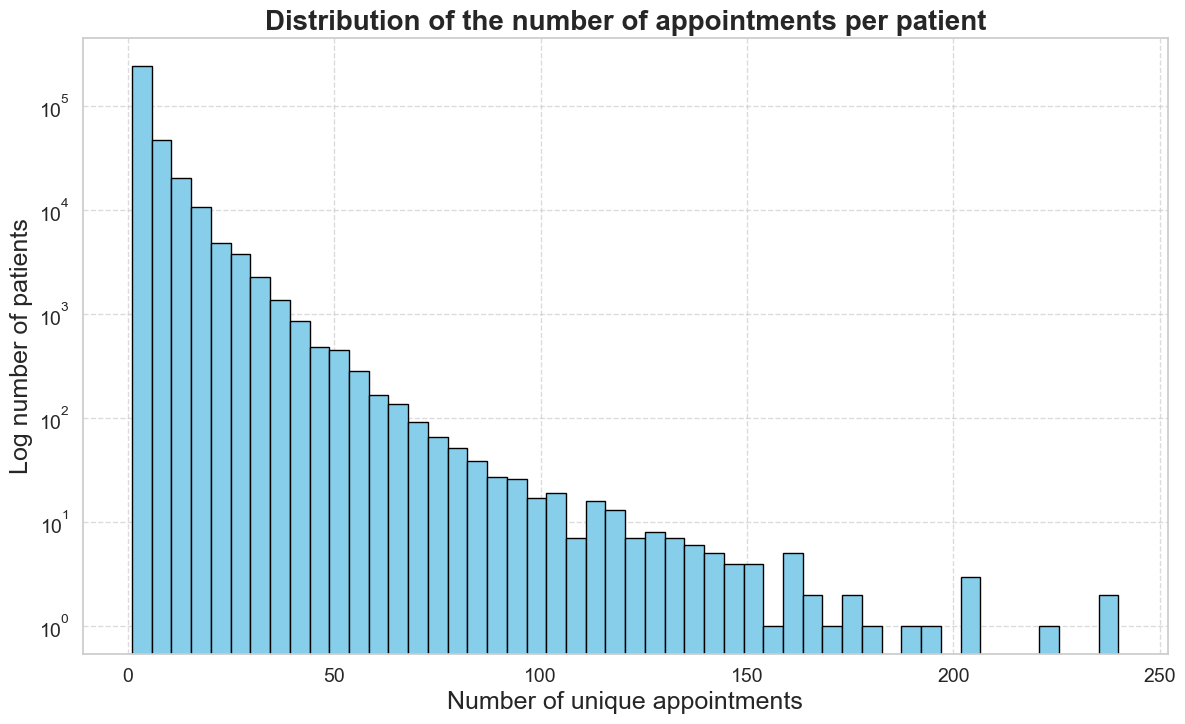

In [732]:
# Distrubution of the number of treatment activities per patient
activities_per_patient = unique_appointments_df.groupby('Patient ID')['Patientkontakt ID'].nunique().reset_index()
activities_per_patient.hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of the number of appointments per patient')
plt.xlabel('Number of unique appointments')
plt.ylabel('Log number of patients')
plt.yscale('log')
plt.show()

__Observation:__ Most patients have only one appointment over the two year period, while others have a lot! Some even more than 200!

### Distribution of the number of meetings (unique Behandlingskontakt ID's) per appointment

We know that one appointment can include one or more treatment contacts (meeetings) if the patient has one visit to the hospital regarding a disease, but while at the hospital both has a meeting with first a nurse and then a physician; that would be two treatment contacts - i.e. meetings.

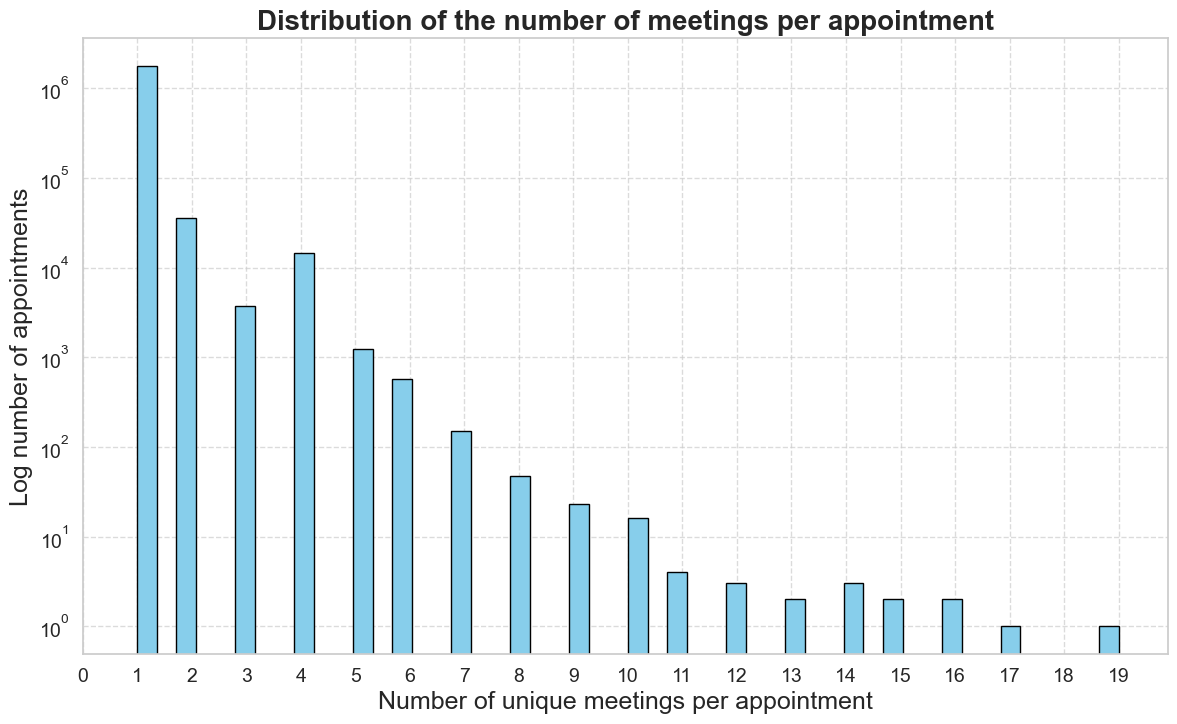

In [734]:
# Distribution of the number of meetings per appointment
meetings_per_appointment = df.groupby('Patientkontakt ID')['Behandlingskontakt ID'].nunique()
meetings_per_appointment.hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of the number of meetings per appointment')
plt.xlabel('Number of unique meetings per appointment')
plt.ylabel('Log number of appointments')
# Set x-ticks to be every second number
max_value = meetings_per_appointment.max()
plt.xticks(range(0, max_value + 1, 1))
plt.yscale('log')
plt.show()   

__Observation:__
Similar to the trend for the number of appointments. Above, we see that most patients have only one meeting per appointment, while a smaller number of patients have a lot more. The maximum number of "treatment" meetings is 19! Interestingly, it's more common to have 4 meetings than 3.

__Question for further analysis:__ Do acute appointments have more meetings?

### How many patients account for 80% of the appointments?

In [735]:
activities_per_patient.columns = ['Patient ID', 'Number of activities']
# How many patients account for 80% of the activities?
activities_per_patient = activities_per_patient.sort_values('Number of activities', ascending=False)
activities_per_patient['cumsum'] = activities_per_patient['Number of activities'].cumsum()
activities_per_patient['cumsum_percentage'] = activities_per_patient['cumsum'] / activities_per_patient['Number of activities'].sum()
top_80_percent = activities_per_patient[activities_per_patient['cumsum_percentage'] <= 0.8]
top_80_percent_count = top_80_percent.shape[0]
top_80_percent_activities = top_80_percent['Number of activities'].sum()
print(f"{top_80_percent_count} ({top_80_percent_count / df['Patient ID'].nunique():.2%}) patients account for 80% of the appointments, which is {top_80_percent_activities} activities.")

129767 (39.11%) patients account for 80% of the appointments, which is 1456945 activities.


### Most common diagnoses related to the appointments

C:\Users\Lasse\AppData\Local\Temp\ipykernel_28256\1012801954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_appointments_df['Aktionsdiagnosetekst'] = unique_appointments_df['Aktionsdiagnosekode'].map(diagnosis_mapping)
C:\Users\Lasse\AppData\Local\Temp\ipykernel_28256\1012801954.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_appointments_df['Aktionsdiagnose'] = '(' + unique_appointments_df['Aktionsdiagnosekode'] + ') ' + unique_appointments_df['Aktionsdiagnosetekst']


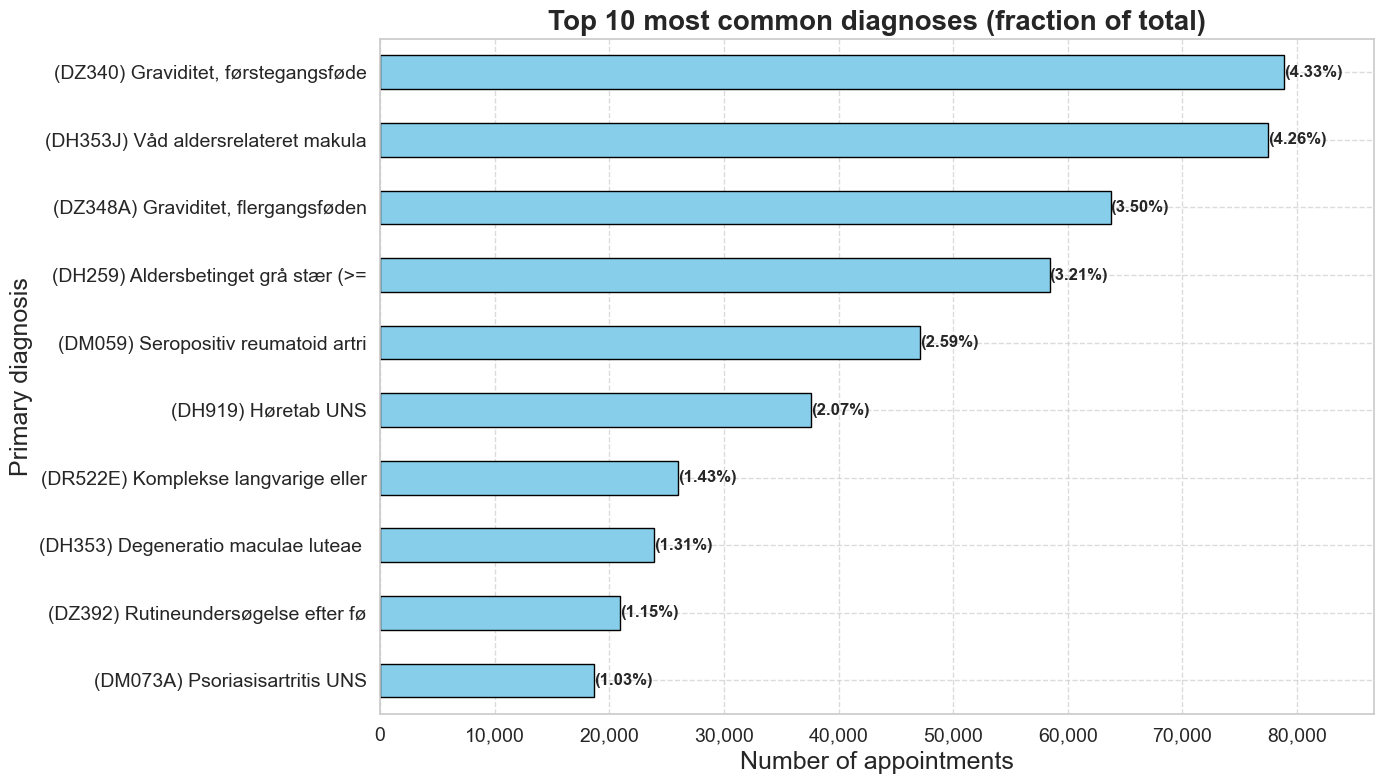

In [738]:
# Make mapping from 'Aktionsdiagnosekode' to 'Aktionsdiagnosetekst'
diagnosis_mapping = diag.set_index('Aktionsdiagnosekode')['Aktionsdiagnosetekst'].to_dict()
df['Aktionsdiagnosetekst'] = df['Aktionsdiagnosekode'].map(diagnosis_mapping)
unique_appointments_df['Aktionsdiagnosetekst'] = unique_appointments_df['Aktionsdiagnosekode'].map(diagnosis_mapping)

# Add column, merging Aktionsdiagnosekode and Aktionsdiagnosetekst
df['Aktionsdiagnose'] = '(' + df['Aktionsdiagnosekode'] + ') ' + df['Aktionsdiagnosetekst'] 
unique_appointments_df['Aktionsdiagnose'] = '(' + unique_appointments_df['Aktionsdiagnosekode'] + ') ' + unique_appointments_df['Aktionsdiagnosetekst']

# Plot of the top 10 most common values in the 'Aktionsdiagnosekode' column
top_10_diagnoses = unique_appointments_df['Aktionsdiagnose'].value_counts().head(10).sort_values(ascending=True)

# Truncate the labels to the first 15 characters
truncated_labels = [label[:35] for label in top_10_diagnoses.index]

# Calculate percentages
total = unique_appointments_df['Aktionsdiagnose'].count()
percentages = (top_10_diagnoses / total) * 100

# Create the plot
ax = top_10_diagnoses.plot(kind='barh', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Top 10 most common diagnoses (fraction of total)')
plt.xlabel('Number of appointments')
plt.ylabel('Primary diagnosis')

# Set truncated y-tick labels
ax.set_yticks(range(len(truncated_labels)))
ax.set_yticklabels(truncated_labels)

ax.set_xlim(0, top_10_diagnoses.max() * 1.1)

# Add percentages on the bars
for i, (count, percentage) in enumerate(zip(top_10_diagnoses, percentages)):
    ax.text(count, i, f'({percentage:.2f}%)', va='center', fontsize=12, weight='bold')

# Format the x-axis to include commas for large numbers
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.tight_layout()

# Show the plot
plt.show()


__Observation:__ The most commonly occuring appointsments are related to pregnancies or eye problems.

### When do the appointments for the most common diagnoses start?

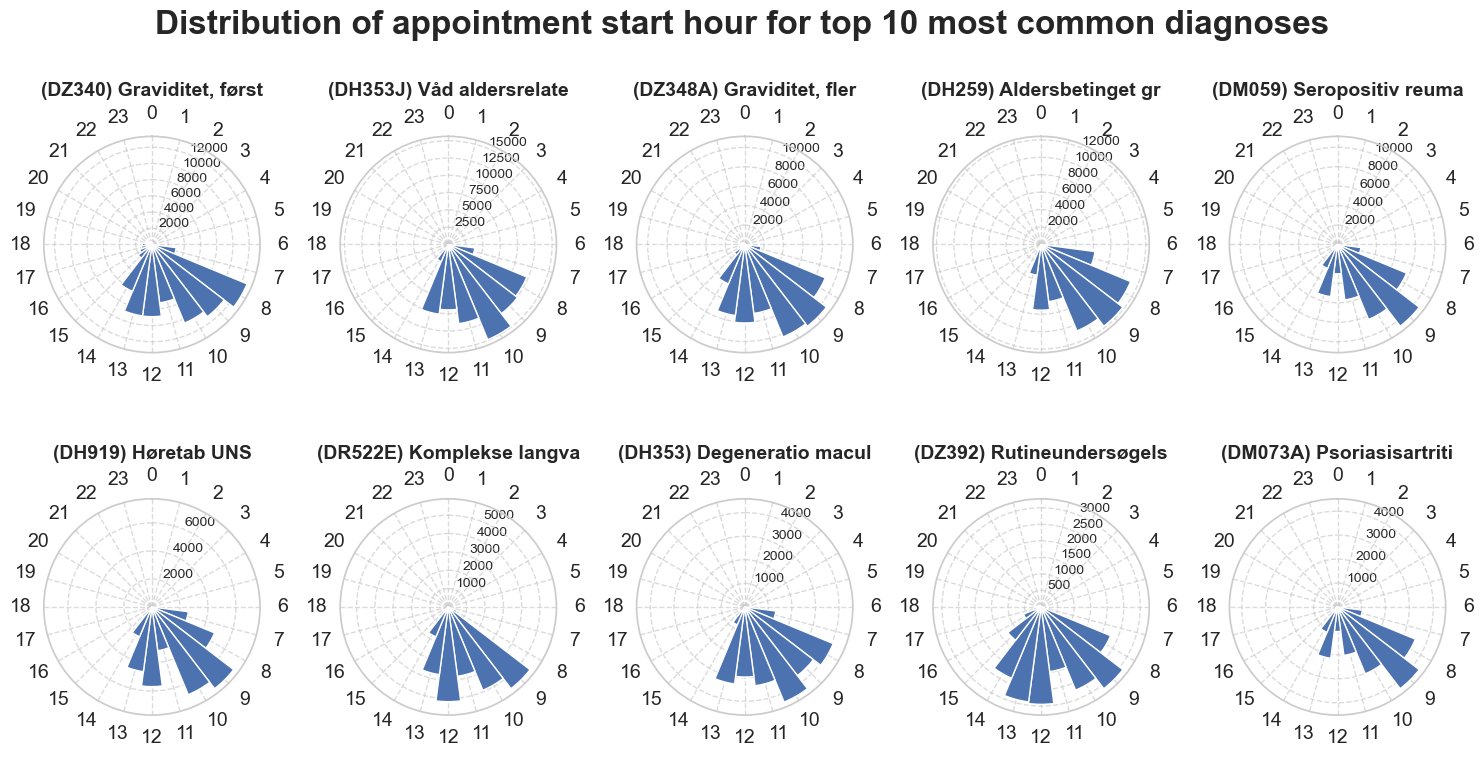

In [ ]:
def plot_clock_chart_grid(df, time_column, diagnosis_column, diagnosis_list, grid_shape=(2, 5)):
    """
    Plots a grid of clock charts (polar bar charts) showing appointment frequency distributions 
    for multiple diagnosis codes.

    Parameters:
    - df: Pandas DataFrame containing the dataset.
    - time_column: String, column name containing datetime values.
    - diagnosis_column: String, column name containing diagnosis codes.
    - diagnosis_list: List of diagnosis codes to plot.
    - grid_shape: Tuple (rows, cols) defining the grid layout for subplots.
    """

    # Create subplots
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(15, 8), subplot_kw={'projection': 'polar'})
    axes = axes.flatten()  # Flatten for easier indexing

     # Set the figure title before tight_layout to ensure proper positioning
    fig.suptitle("Distribution of appointment start hour for top 10 most common diagnoses", fontsize=24, fontweight='bold')  

    # Loop through the list of diagnosis codes
    for i, diagnosis in enumerate(diagnosis_list):
        if i >= len(axes):
            break  # Avoid plotting more than available subplot spaces

        # Filter the dataset for the current diagnosis
        df_filtered = df[df[diagnosis_column] == diagnosis].copy()

        if df_filtered.empty:
            axes[i].set_title(f"{diagnosis} (No Data)")
            axes[i].axis('off')
            continue  # Skip empty diagnosis categories

        # Convert time column to datetime
        df_filtered[time_column] = pd.to_datetime(df_filtered[time_column])

        # Extract hour from timestamps
        df_filtered['Hour'] = df_filtered[time_column].dt.hour

        # Count occurrences per hour
        hourly_counts = df_filtered['Hour'].value_counts().sort_index()

        # Ensure all 24 hours are represented (fill missing hours with 0)
        hourly_counts = hourly_counts.reindex(range(24), fill_value=0)

        # Convert hours into angles (radians)
        angles = np.linspace(0, 2 * np.pi, 24, endpoint=False)

        # Adjust orientation: set midnight (00:00) pointing upwards
        axes[i].set_theta_zero_location("N")  # 'N' means top (North)
        axes[i].set_theta_direction(-1)  # Clockwise direction

        # Plot bars
        axes[i].bar(angles, hourly_counts, width=2 * np.pi / 24, bottom=0, align='center')

        # Set labels to 24-hour format
        axes[i].set_xticks(angles)
        axes[i].set_xticklabels(range(24))
        axes[i].yaxis.set_tick_params(labelsize=10)

        # Set title for each subplot
        axes[i].set_title(f"{diagnosis[:25]}", fontsize=14, fontweight='bold')

    # Remove any unused subplots
    for j in range(len(diagnosis_list), len(axes)):
        axes[j].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

df_diagnoses = unique_appointments_df[['Aktionsdiagnose', 'Kontakt startdato']].dropna()
diagnosis_codes = top_10_diagnoses.sort_values(ascending=False).keys().tolist()

plot_clock_chart_grid(df_diagnoses, time_column='Kontakt startdato', diagnosis_column='Aktionsdiagnose', diagnosis_list=diagnosis_codes, grid_shape=(2, 5))


__Observation:__ Appointments with the 10 most common diagnoses typically start between 08:00 and 13:00. 

__Question for further analysis:__ Can we identify potential bottlenecks in terms of departments being overloaded at certain points during the day?

### What treatments take the longest to perform on average?

C:\Users\Lasse\AppData\Local\Temp\ipykernel_28256\269144923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_appointments_df['Kontakt varighed'] = unique_appointments_df['Kontakt varighed (timer)'].str.replace(',', '.').astype(float)
C:\Users\Lasse\AppData\Local\Temp\ipykernel_28256\269144923.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Kontakt varighed', y='Aktionsdiagnose', data=filtered_df, palette='pastel', order=top_10__longest_diagnoses, showfliers=False, showmeans=True, meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"})


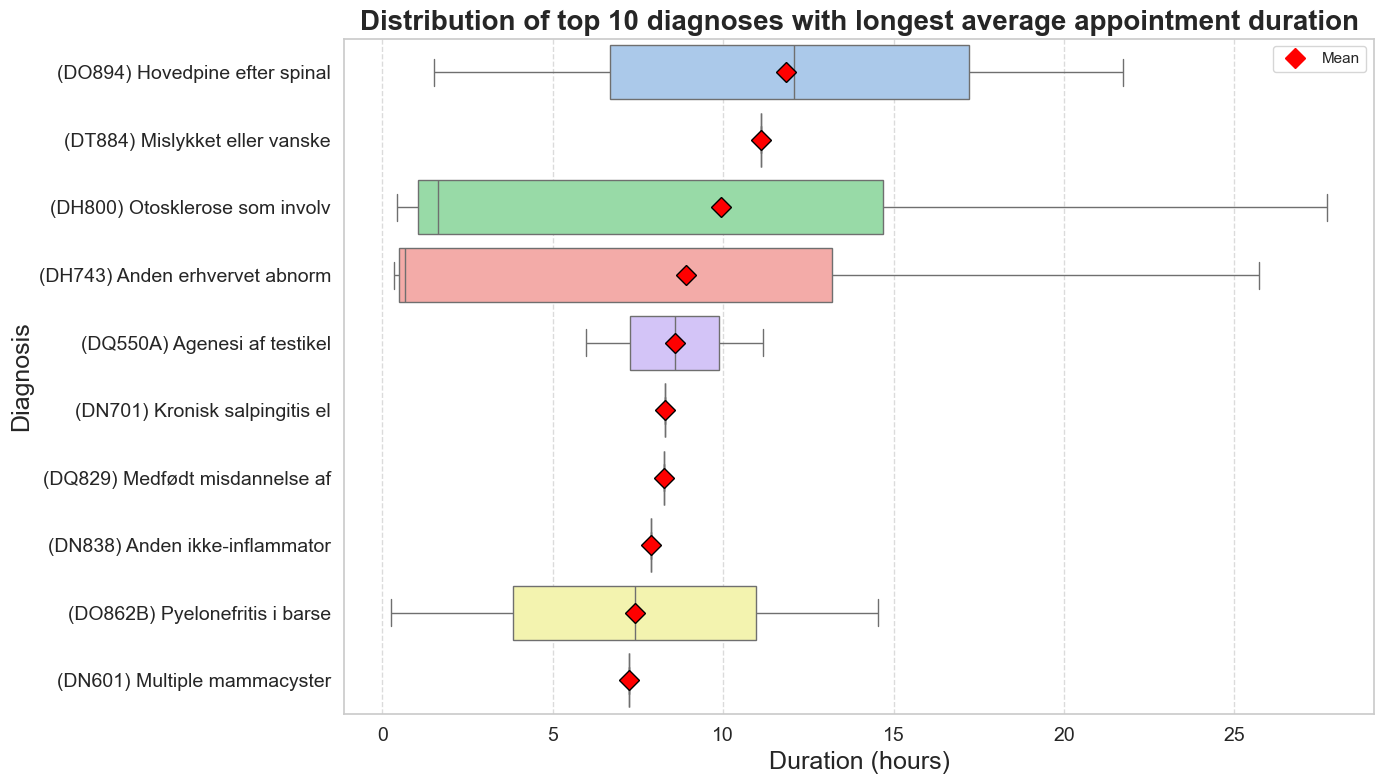

In [ ]:
from matplotlib.lines import Line2D

# Turn 'Kontakt varighed' into reals
unique_appointments_df['Kontakt varighed'] = unique_appointments_df['Kontakt varighed (timer)'].str.replace(',', '.').astype(float)

# Filter out extreme outliers
filtered_unique_appointments_df = unique_appointments_df[unique_appointments_df['Kontakt varighed'] <= 50] 

# Calculate the average duration of each treatment activity
average_duration = filtered_unique_appointments_df.groupby('Aktionsdiagnose')['Kontakt varighed'].mean().sort_values(ascending=False)

# Get the top 10 longest treatment activities
top_10__longest_diagnoses = average_duration.head(10).index

# Filter the DataFrame for the top 10 longest treatment activities
filtered_df = filtered_unique_appointments_df[filtered_unique_appointments_df['Aktionsdiagnose'].isin(top_10__longest_diagnoses)]

# Create the horizontal boxplot
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Kontakt varighed', y='Aktionsdiagnose', data=filtered_df, palette='pastel', order=top_10__longest_diagnoses, showfliers=False, showmeans=True, meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"})

# Add title and labels
plt.title('Distribution of top 10 diagnoses with longest average appointment duration')
plt.xlabel('Duration (hours)')
plt.ylabel('Diagnosis')

# Format the x-axis to include commas for large numbers
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Truncate the labels to the first 30 characters
truncated_labels = [label[:30] for label in top_10__longest_diagnoses]

# Set truncated y-tick labels
ax.set_yticklabels(truncated_labels)

# Adjust layout to make room for labels
plt.tight_layout()

# Create a custom legend
custom_lines = [Line2D([0], [0], color='red', marker='D', linestyle='None', markersize=10, label='Mean')]
ax.legend(handles=custom_lines)

# Show the plot
plt.show()


__Observation:__ There is considerable variation in the duration of appointments, some lasting more than 10 hours. However, the diagnoses with the longest appointment durations are very rare, though:

In [739]:
# The top 10 treatment activities with the longest average duration take up a small portion of the total appointments
total_appointments = filtered_unique_appointments_df.shape[0]
top_10_appointments = filtered_df.shape[0]
top_10_appointments_percentage = top_10_appointments / total_appointments
print(f"The top 10 treatment activities with the longest average duration account for {top_10_appointments} ({top_10_appointments_percentage:.5%}) of the total appointments.")

The top 10 treatment activities with the longest average duration account for 19 (0.00104%) of the total appointments.


### Distribution of the number of repeated appointments per patient for each diagnosis

C:\Users\Lasse\AppData\Local\Temp\ipykernel_28256\3208288456.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Number of Appointments', y='Aktionsdiagnose', data=filtered_appointments, palette='pastel', showmeans=True, meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"}, order=top_ten_diagnoses)
C:\Users\Lasse\AppData\Local\Temp\ipykernel_28256\3208288456.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(truncated_labels)


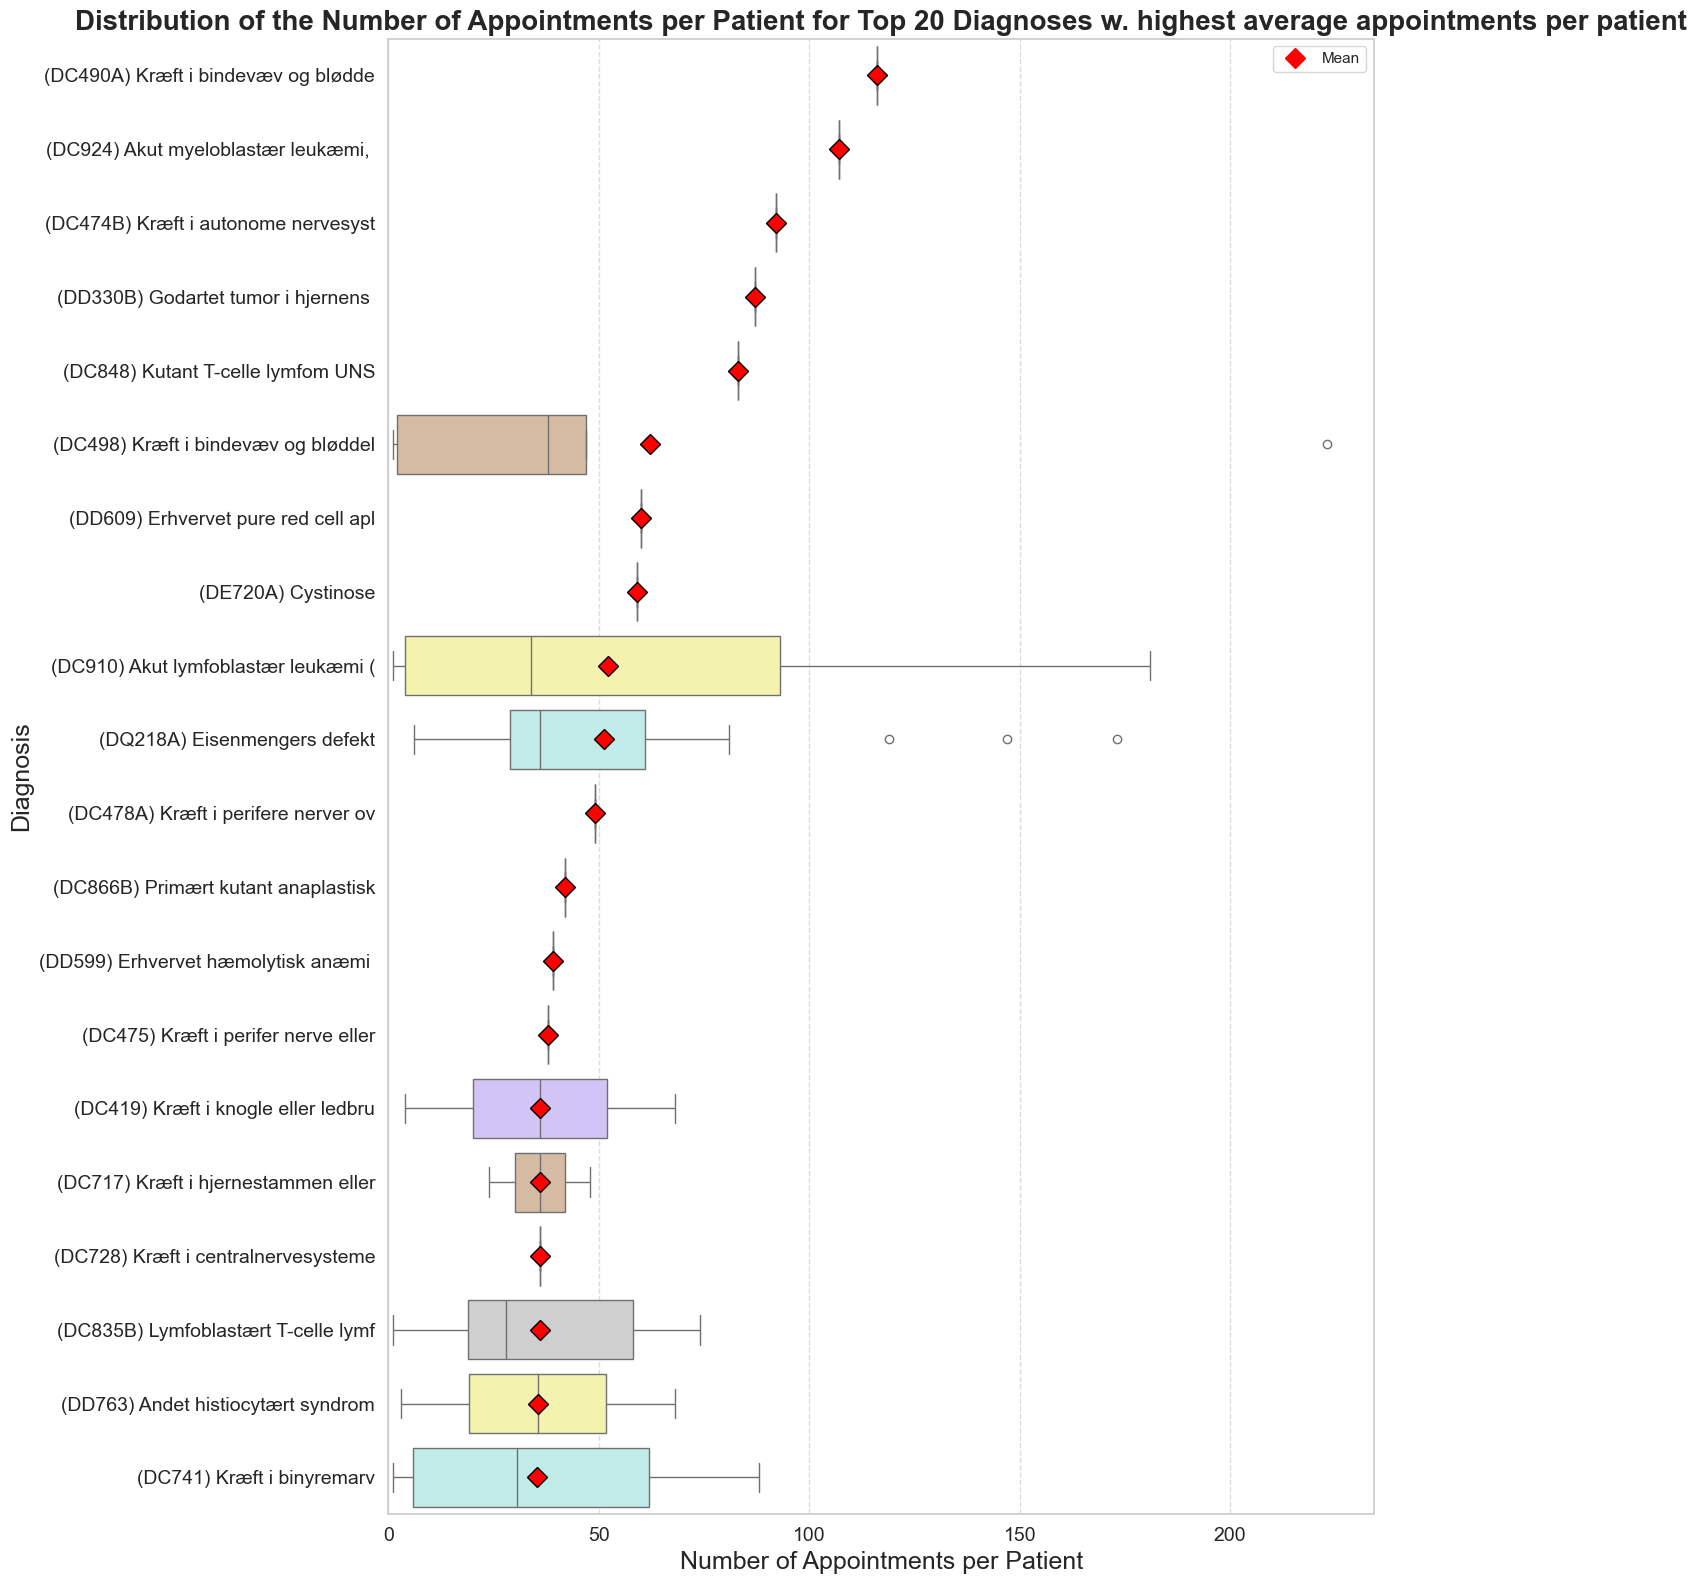

In [746]:

# Calculate the number of appointments per patient for each diagnosis
appointments_per_patient_diagnosis = unique_appointments_df.groupby(['Aktionsdiagnose', 'Patient ID']).size().reset_index(name='Number of Appointments')

# Calculate the average number of appointments per patient for each diagnosis
average_appointments_per_diagnosis = appointments_per_patient_diagnosis.groupby('Aktionsdiagnose')['Number of Appointments'].mean().reset_index()

# Identify the top ten diagnoses with the most repeated appointments per patient
top_ten_diagnoses = average_appointments_per_diagnosis.nlargest(20, 'Number of Appointments')['Aktionsdiagnose']

# Filter the DataFrame to include only the top ten diagnoses
filtered_appointments = appointments_per_patient_diagnosis[appointments_per_patient_diagnosis['Aktionsdiagnose'].isin(top_ten_diagnoses)]

# Create the boxplot
plt.figure(figsize=(14, 16))
ax = sns.boxplot(x='Number of Appointments', y='Aktionsdiagnose', data=filtered_appointments, palette='pastel', showmeans=True, meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"}, order=top_ten_diagnoses)
ax.set_xlim(0, filtered_appointments['Number of Appointments'].max() * 1.05)

# Add title and labels
plt.title('Distribution of the Number of Appointments per Patient for Top 20 Diagnoses w. highest average appointments per patient')
plt.xlabel('Number of Appointments per Patient')
plt.ylabel('Diagnosis')

# Truncate the labels to the first 30 characters
truncated_labels = [label[:35] for label in top_ten_diagnoses]

# Set truncated y-tick labels
ax.set_yticklabels(truncated_labels)

# Create a custom legend
custom_lines = [Line2D([0], [0], color='red', marker='D', linestyle='None', markersize=10, label='Mean')]
ax.legend(handles=custom_lines)

# Show the plot
plt.tight_layout()
plt.show()

__Observation:__ We observe that some diagnoses have a high number of repeated appointments per patient (remember this is over a two year period). I.e. patients will have many appointments with the same primary diagnosis. 

We also observe that many of the above diagnoses have the Aktionsdiagnosekode starting with 'DC'. It turns out that all of them are within the Gruppe 1 of Neoplasmer and Gruppe 2 of Kræftsygdomme (see diagnosis classification in provided Diagnosis dimension table). 

So diagnoses that will have people visit the hospital a lot is typically cancer-related. 

E.g. there's one patient who has had 223 appointments related to diagnosis '(DC498) Kræft i bindevæv og bløddelsvæv overgribende flere lokalisationer'! 

### How many appointments per responsible hospital department?

<Figure size 1400x800 with 0 Axes>

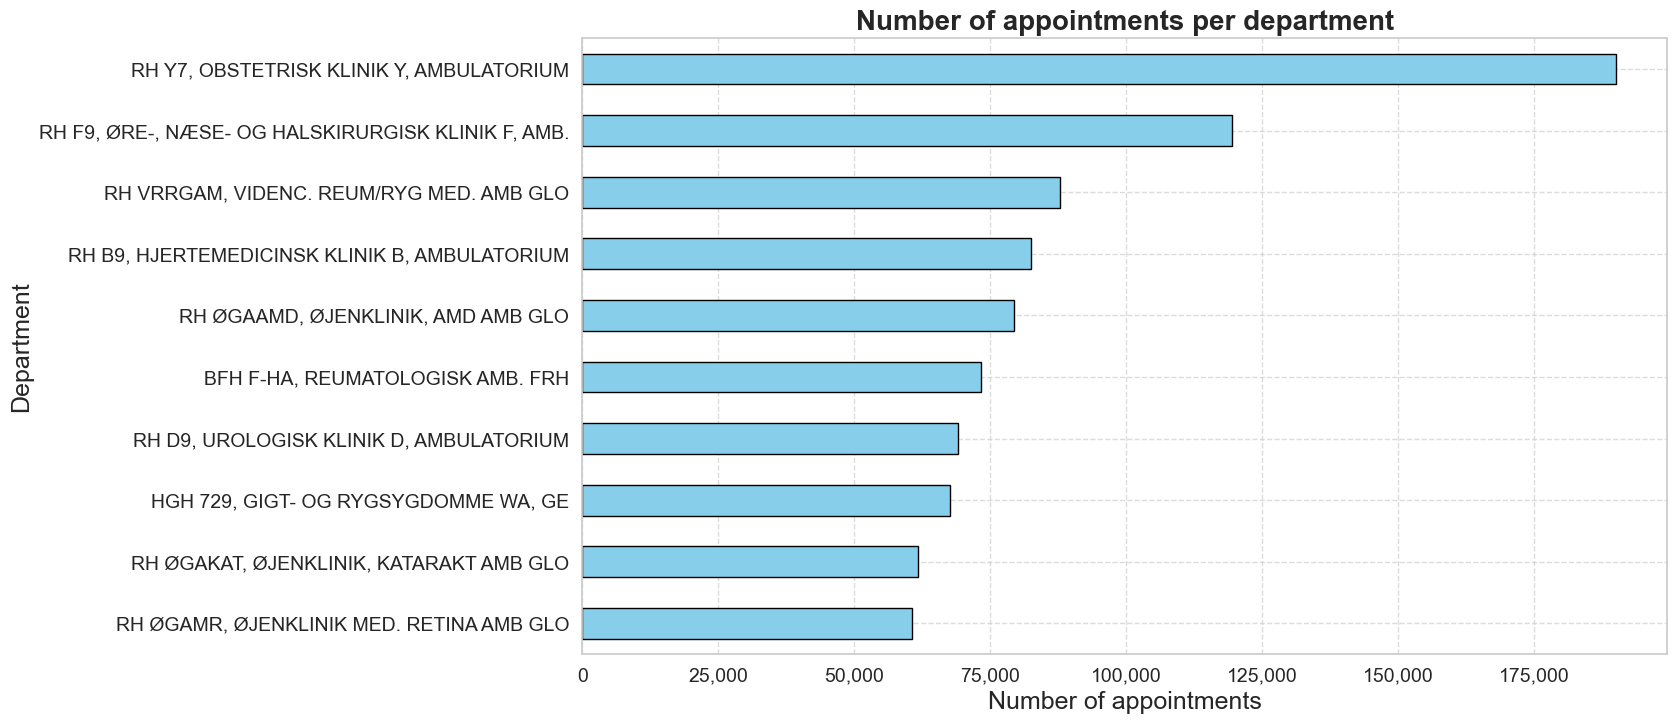

In [747]:
# Chart of the number of appointments per department
department_appointments = unique_appointments_df['Behandlingsansvarlig Afdeling'].value_counts().reset_index()
department_appointments.columns = ['Department', 'Number of appointments']
department_appointments = department_appointments.sort_values('Number of appointments', ascending=True)

# Create the horizontal bar plot
plt.figure()
ax = department_appointments.tail(10).plot(kind='barh', x='Department', y='Number of appointments', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Number of appointments per department')
plt.xlabel('Number of appointments')
plt.ylabel('Department')

# Format the x-axis to include commas for large numbers
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax.legend().remove()    

# Show the plot
plt.show()

__Observation:__ Obstetrisk klinik takes care of child births. The high number of appointments in this department is in accordance with child births being one of the most common diagnoses for outpatient appointments. 

## Socio-demographics 

### Distribution of age

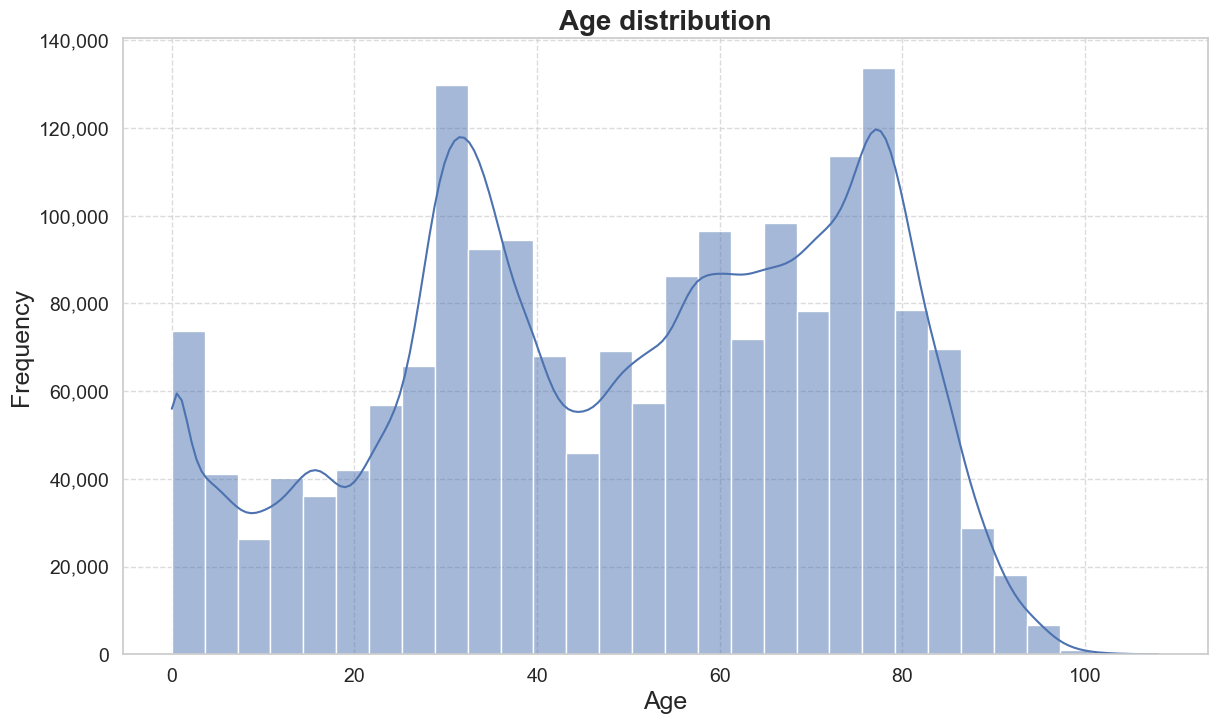

In [748]:
plt.figure()
ax = sns.histplot(unique_appointments_df['Patient alder på kontaktstart tidspunkt'], bins=30, kde=True)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.show()

__Observation:__ To peaks catch your attention: One around 30 (probably due to child births) and another around 77 (probably due to age related issues like eye problems). 

### Distribution of gender

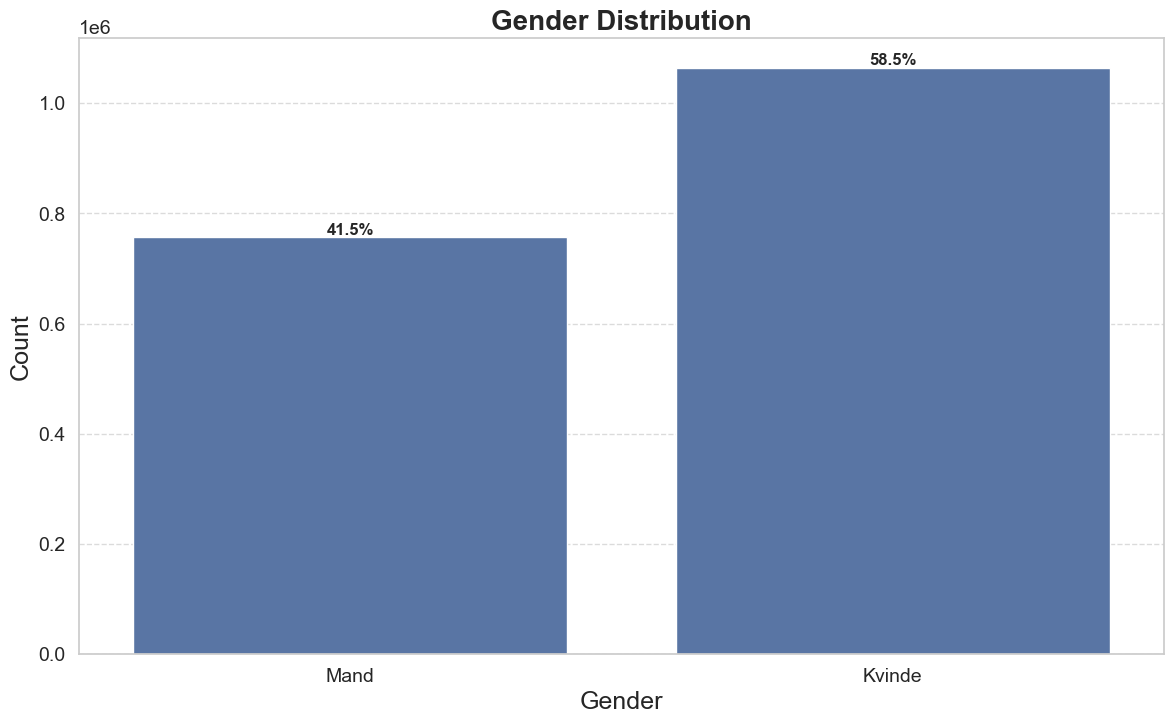

In [749]:
# Filter the DataFrame to exclude values of "Ukendt" in the 'Patient køn' column
filtered_df = unique_appointments_df[unique_appointments_df['Patient køn'] != 'Ukendt']

# Create the plot
plt.figure()
ax = sns.countplot(x='Patient køn', data=filtered_df)

# Calculate percentages
total = len(filtered_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12, weight='bold')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

__Observation:__ More women have appointsments than men. 

### Distribution of marital status

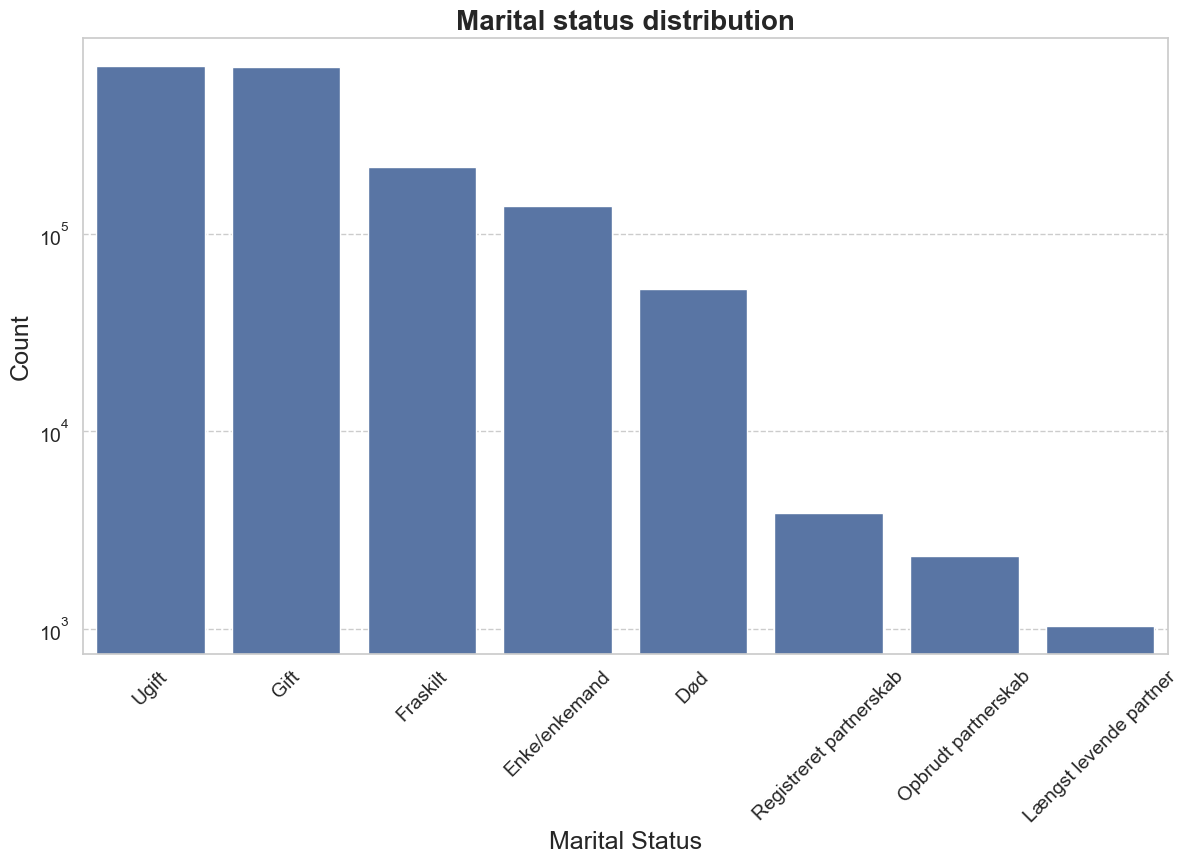

In [751]:
plt.figure()
sns.countplot(x='Patient civilstand', data=unique_appointments_df)
plt.title('Marital status distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Tilt the x-axis labels
# Grid
plt.grid(axis='y', linestyle='--', alpha=1)
plt.yscale('log')
plt.show()

### Let's look closer at the high-activity patients, here defined as the top 10% with the most outpatient appointments (i.e. patients having more than 13 unique appointments).

In [752]:
# Count number of outpatient visits per patient
patient_visit_counts = unique_appointments_df.groupby('Patient ID')['Patientkontakt ID'].nunique()

# Define high-activity patients (top 10%)
threshold = patient_visit_counts.quantile(0.90)
high_activity_patients = patient_visit_counts[patient_visit_counts >= threshold]

# Merge back with original dataset
df_high_activity = unique_appointments_df[unique_appointments_df['Patient ID'].isin(high_activity_patients.index)]

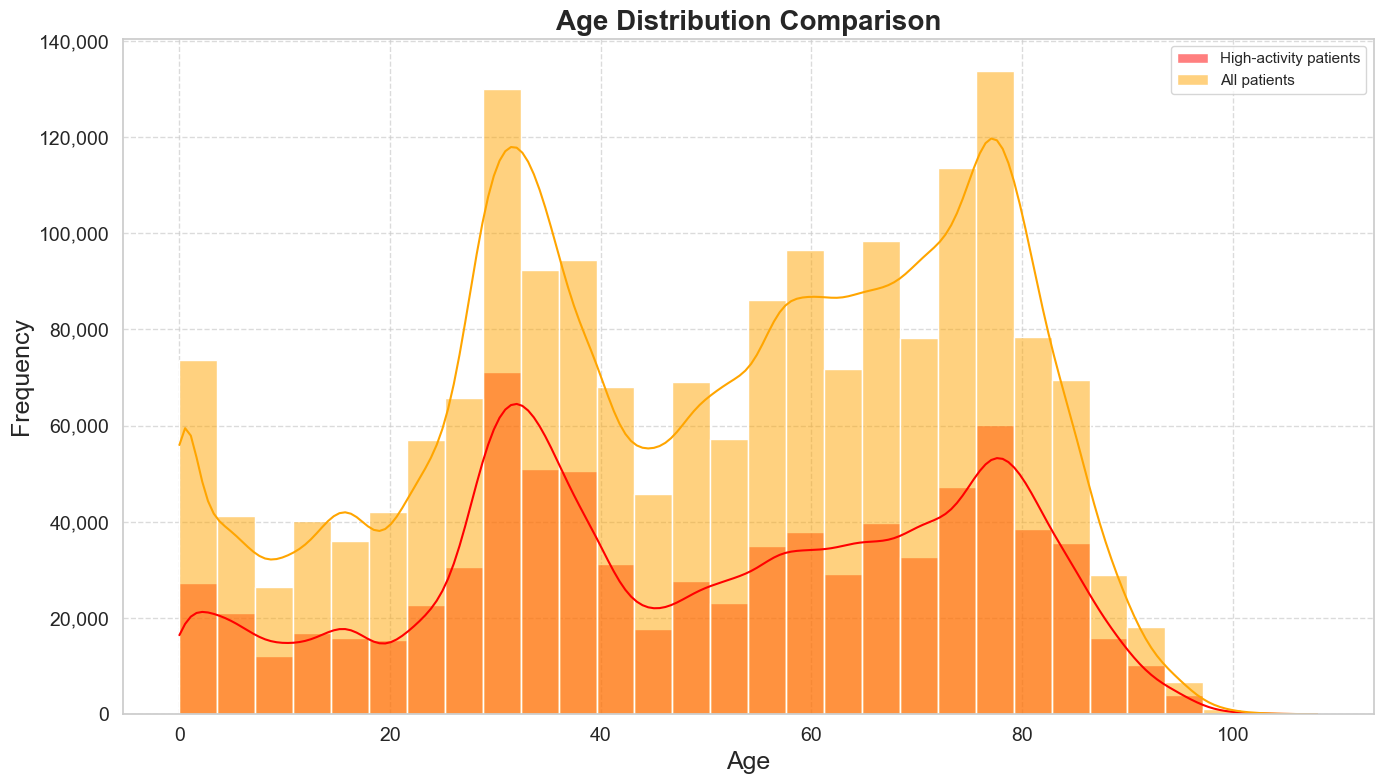

In [753]:
# Create the figure and axis
plt.figure()

# Plot the first histogram with aligned KDE color
sns.histplot(df_high_activity['Patient alder på kontaktstart tidspunkt'], bins=30, kde=True, color='red', label='High-activity patients')

# Plot the second histogram with aligned KDE color
sns.histplot(unique_appointments_df['Patient alder på kontaktstart tidspunkt'], bins=30, kde=True, color='orange', label='All patients')

# Add title and labels
plt.title('Age Distribution Comparison')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Format the y-axis to include commas for large numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

__Observation:__ Seems to follow the same trends. No visible difference in the age distribution. 

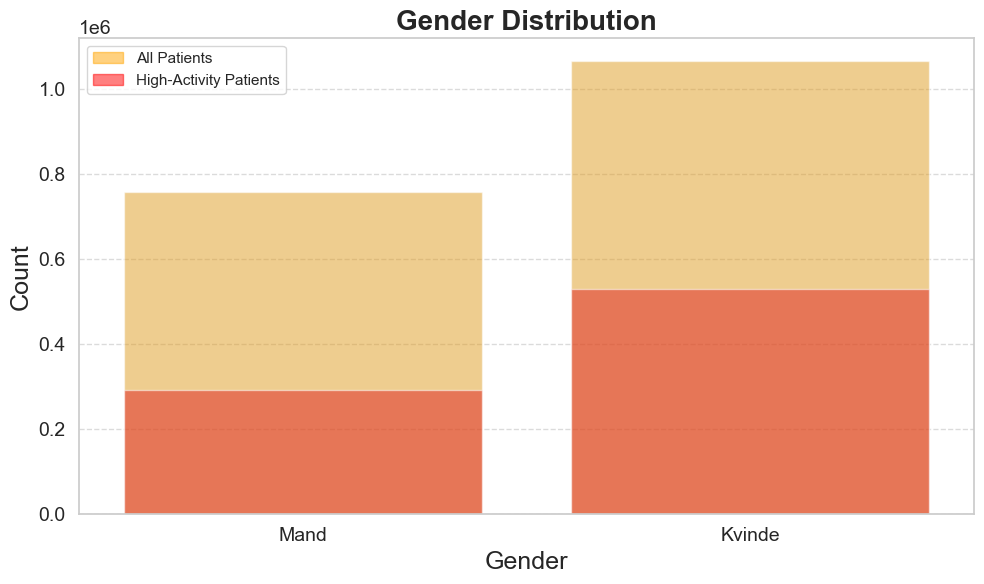

In [755]:
import matplotlib.patches as mpatches

# Filter the DataFrame to exclude values of "Ukendt" in the 'Patient køn' column
filtered_df = unique_appointments_df[unique_appointments_df['Patient køn'] != 'Ukendt']
filtered_df_high_activity = df_high_activity[df_high_activity['Patient køn'] != 'Ukendt']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for all patients
sns.countplot(x='Patient køn', data=filtered_df, color='orange', alpha=0.5, label='All Patients')

# Plot for high-activity patients
sns.countplot(x='Patient køn', data=filtered_df_high_activity, color='red', alpha=0.5, label='High-Activity Patients')

# Add title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Create custom legend
blue_patch = mpatches.Patch(color='orange', alpha=0.5, label='All Patients')
red_patch = mpatches.Patch(color='red', alpha=0.5, label='High-Activity Patients')
plt.legend(handles=[blue_patch, red_patch])

# Show the plot
plt.tight_layout()
plt.show()

__Observation:__ Seems to follow the same trends. No visible difference in the gender distribution. 

__Question for further analysis:__ What are the most common diagnoses for high-activity patients?

## Key factor analysis (Not done)

Identify top 5 factors affecting patients having the 10% highest number of appointments

## PCA (Partly done)

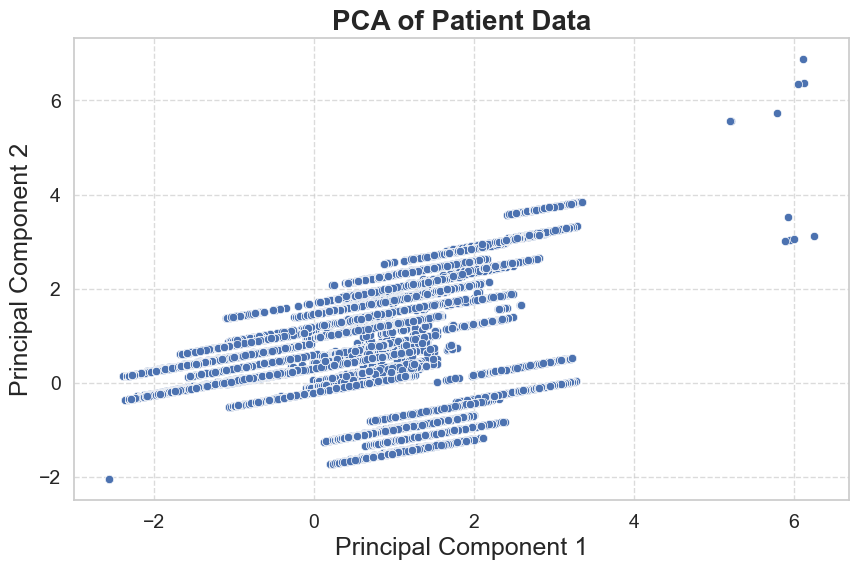

Explained variance by principal components: [0.19847368 0.12427136]


In [ ]:
# Select categorical and numerical features
categorical_features = ['Patient køn', 'Patient civilstand']  # Add other categorical features as needed
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# One-hot encode categorical features
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

# Combine encoded categorical features with numerical features
df_combined = pd.concat([df[numerical_features], df_encoded], axis=1)

# Drop rows with NaN values for simplicity
df_combined = df_combined.dropna()

# Standardize the features
x = StandardScaler().fit_transform(df_combined)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Add the principal components to the original dataframe
df_pca = pd.concat([df.reset_index(drop=True), principal_df], axis=1)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=df_pca)
plt.title('PCA of Patient Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by principal components: {explained_variance}")

## Network analysis

__Approach:__ We create a network of diagnoses in the dataset, connected them as nodes if at least one patient has had appointments for which that diagnosis was the primary diagnosis (a.k.a Aktionsdiagnosekode). The weight of the edge between two diagnoses is the number of patients having both diagnoses in their appointment history. 

In [ ]:
# Create a mapping dictionary from Aktionsdiagnosekode to Aktionsdiagnosetekst
diagnosis_mapping = diag.set_index('Aktionsdiagnosekode')['Aktionsdiagnosetekst'].to_dict()

# Extract relevant data
df_diagnoses = unique_appointments_df[['Patient ID', 'Aktionsdiagnosekode']].dropna()

# Create a dictionary to store the list of Patientkontakt ID for each Aktionsdiagnosekode
diagnosis_to_patients = df_diagnoses.groupby('Aktionsdiagnosekode')['Patient ID'].apply(set).to_dict()

# Create a co-occurrence matrix
print("Counting number of shared patient ID's between diagnose codes...")
co_occurrence = defaultdict(int)
for diag1, diag2 in combinations(diagnosis_to_patients.keys(), 2):
    shared_patients = diagnosis_to_patients[diag1].intersection(diagnosis_to_patients[diag2])
    if shared_patients:
        co_occurrence[frozenset([diag1, diag2])] = len(shared_patients)

# Create the network graph
print("Creating graph...")
G = nx.Graph()
for key, weight in co_occurrence.items():
    diag1, diag2 = list(key)
    G.add_edge(diag1, diag2, weight=weight)

# Create mapping dictionaries from Aktionsdiagnosekode to attributes
gruppe3_mapping = diag.set_index('Aktionsdiagnosekode')['Gruppe 3'].to_dict()
gruppe2_mapping = diag.set_index('Aktionsdiagnosekode')['Gruppe 2'].to_dict()
gruppe1_mapping = diag.set_index('Aktionsdiagnosekode')['Gruppe 1'].to_dict()

# Add attributes to the graph nodes
nx.set_node_attributes(G, gruppe3_mapping, 'Gruppe 3')
nx.set_node_attributes(G, gruppe2_mapping, 'Gruppe 2')
nx.set_node_attributes(G, gruppe1_mapping, 'Gruppe 1')

# Rename the nodes to diagnosis text
G = nx.relabel_nodes(G, diagnosis_mapping)

# Save the network as a GEXF file
nx.write_gexf(G, "network_analysis.gexf")
print("Network saved as network_analysis.gexf")


Counting number of shared patient ID's between diagnose codes...
Creating graph...


### Show the network

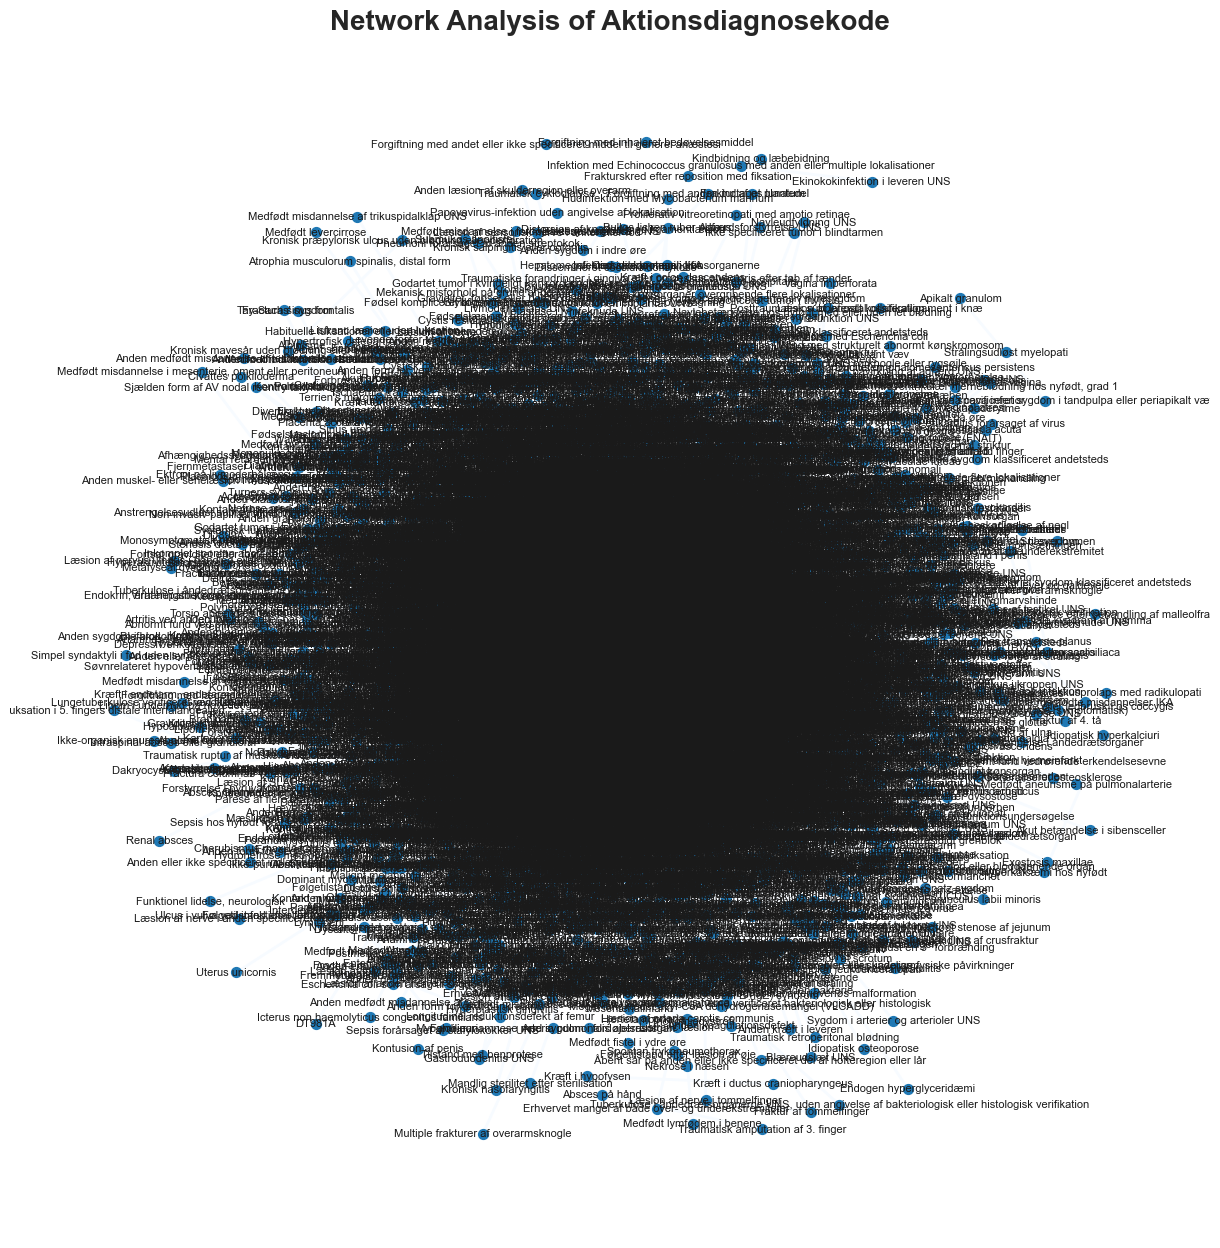

In [765]:
# Check if there are any edges with weights
if nx.get_edge_attributes(G, 'weight'):
    # Visualize the network
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.1)
    edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
    nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, edge_color=weights, edge_cmap=plt.cm.Blues, width=2)
    plt.title('Network Analysis of Aktionsdiagnosekode')
    plt.show()
else:
    print("No edges with weights found in the graph.")

### Look's better if you upload it to Gephi

![Local Image](./network.png)


### Network statistics

In [767]:
# Compute and display network statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degrees = dict(G.degree())
average_degree = sum(degrees.values()) / num_nodes if num_nodes > 0 else 0
density = nx.density(G)
clustering_coefficient = nx.average_clustering(G)
connected_components = nx.number_connected_components(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {average_degree:.2f}")
print(f"Density: {density:.4f}")
print(f"Clustering coefficient: {clustering_coefficient:.4f}")
print(f"Number of connected components: {connected_components}")

# Top 10 nodes by degree
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 nodes by degree:")
for node, degree in sorted_degrees[:10]:
    print(f"{node}: {degree}")


# Extract the edges and their weights
edges_with_weights = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]

# Sort the edges by weight in descending order
sorted_edges = sorted(edges_with_weights, key=lambda x: x[2], reverse=True)

# Print the top 10 edges by weight
top_10_edges = sorted_edges[:10]
print("\nTop 10 edges by weight:")
for edge in top_10_edges:
    print(f"{edge[0]} - {edge[1]}, Weight: {edge[2]}")


Number of nodes: 7320
Number of edges: 115930
Average degree: 31.67
Density: 0.0043
Clustering coefficient: 0.4888
Number of connected components: 13

Top 10 nodes by degree:
Kontakt mhp. undersøgelse af ører eller hørelse: 1719
Kontakt mhp. undersøgelse af øjne eller syn: 1630
Aldersbetinget grå stær (>=50 år) UNS: 1534
Høretab UNS: 1496
Observation pga. mistanke om apopleksi: 1371
Observation pga. mistanke om sygdom i nervesystem: 1366
Kontakt mhp. ergoterapi: 1129
Observation pga. mistanke om kræft: 1090
Observation pga. mistanke om anden hjerte-kar-lidelse: 1086
Graviditet, førstegangsfødende: 1035

Top 10 edges by weight:
Graviditet, førstegangsfødende - Rutineundersøgelse efter fødsel, Weight: 4078
Rutineundersøgelse efter fødsel - Graviditet, flergangsfødende, Weight: 3584
Aldersbetinget grå stær (>=50 år) UNS - Efterstær, Weight: 836
Kontakt mhp. anden form for genoptræning - Fibromyalgi, Weight: 812
Kontakt mhp. undersøgelse af ører eller hørelse - Høretab UNS, Weight: 693
Ald